In [1]:
input_path = '/kaggle/input'

# Remove dark ground images

1. We need to decide a proper threshold to define concretely what a dark image looks like
2. Construct a table of dark trajectories so we can later ignore it. 

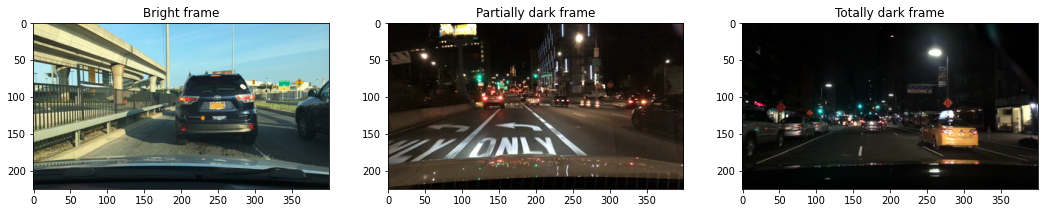

In [2]:
import cv2
from matplotlib import pyplot as plt

sample_trajectory_frames_path = f'{input_path}/frame-extraction-0-1/frames'
partially_dark_frame = f'{sample_trajectory_frames_path}/015e6ee5-bff02c40/000.png'
totally_dark_frame   = f'{sample_trajectory_frames_path}/02cfe806-1b386c8a/000.png'
bright_frame         = f'{sample_trajectory_frames_path}/0000f77c-6257be58/000.png'

fig, (ax1, ax2, ax3) = plt.subplots(1,3)
fig.set_size_inches(18, 10)
ax1.imshow(cv2.cvtColor(cv2.imread(bright_frame), cv2.COLOR_BGR2RGB))
ax1.set_title('Bright frame')
ax2.imshow(cv2.cvtColor(cv2.imread(partially_dark_frame), cv2.COLOR_BGR2RGB))
ax2.set_title('Partially dark frame')
ax3.imshow(cv2.cvtColor(cv2.imread(totally_dark_frame), cv2.COLOR_BGR2RGB))
ax3.set_title('Totally dark frame')

plt.show()

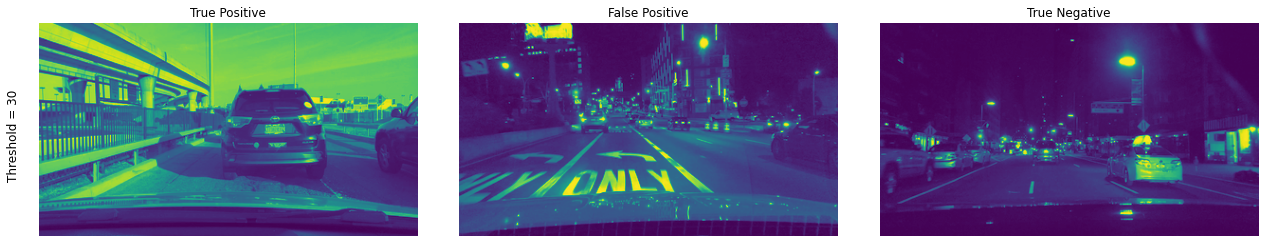

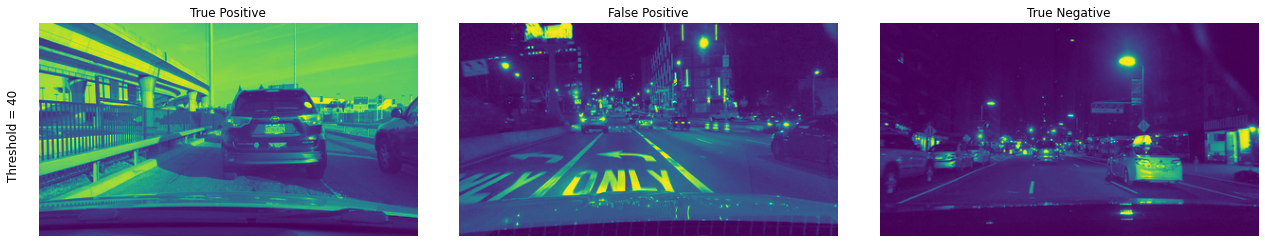

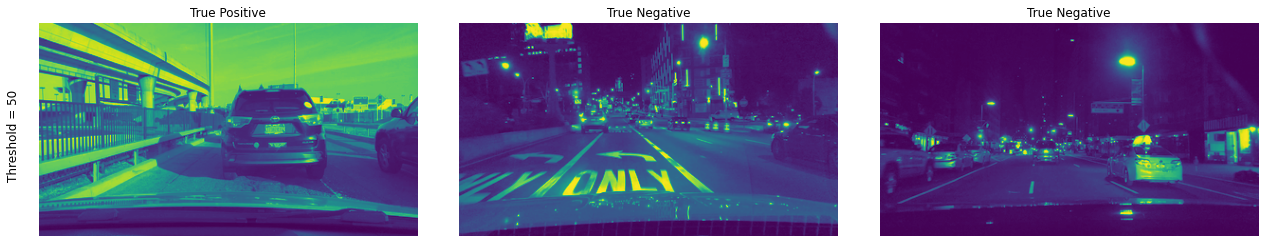

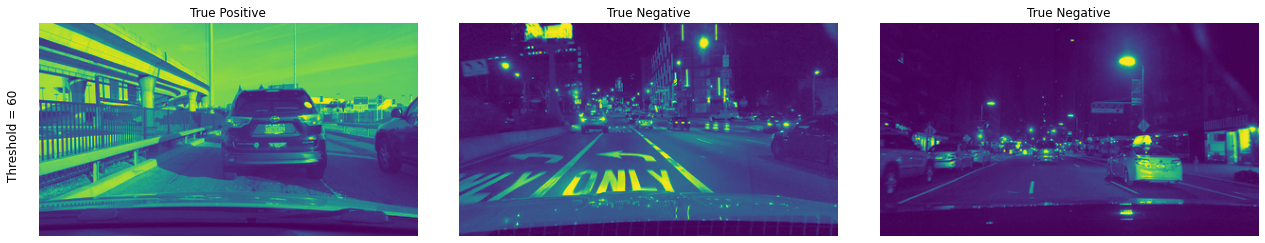

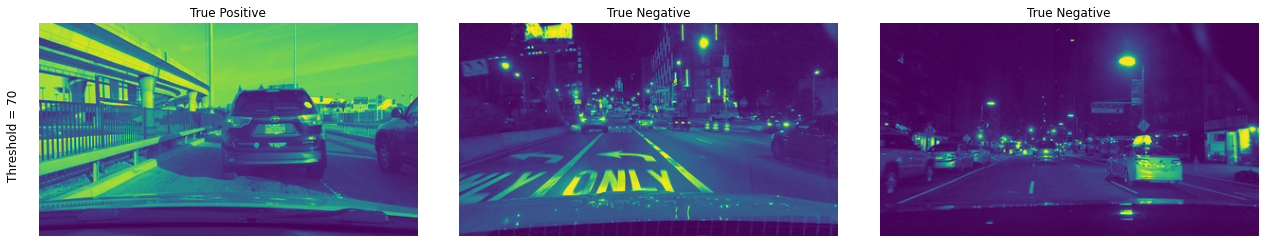

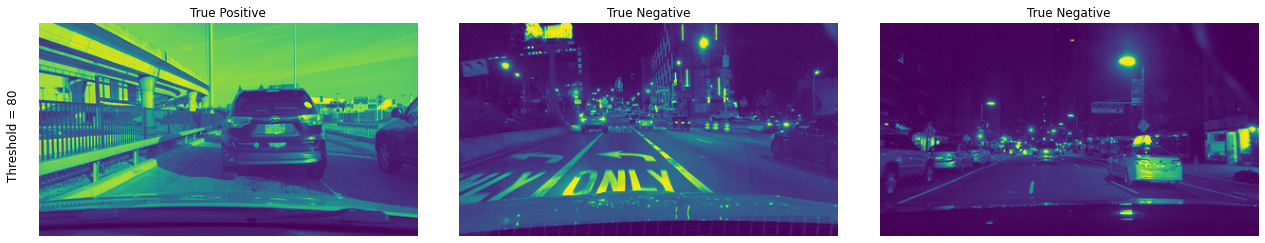

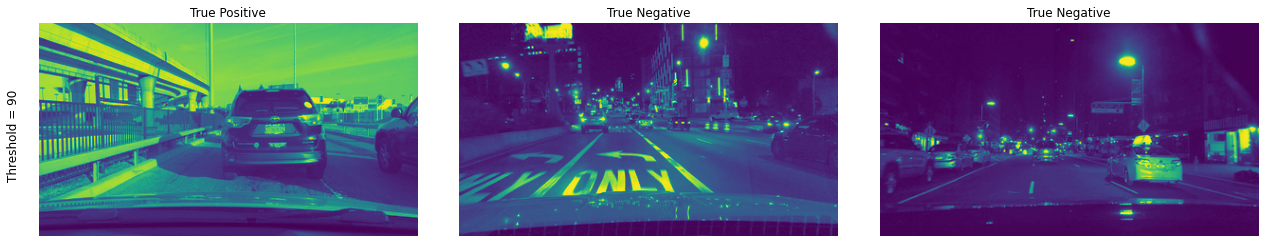

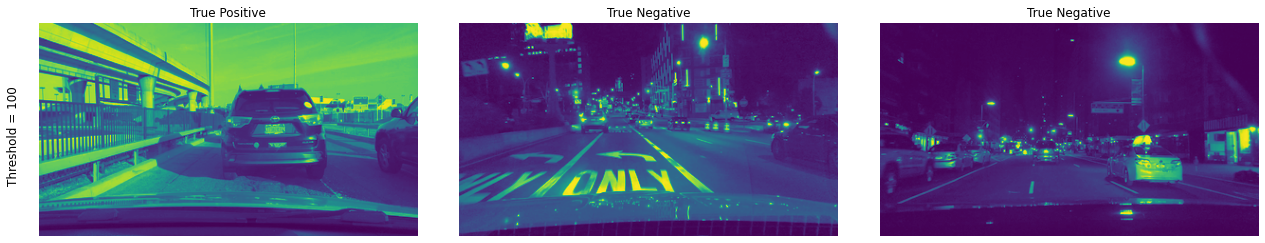

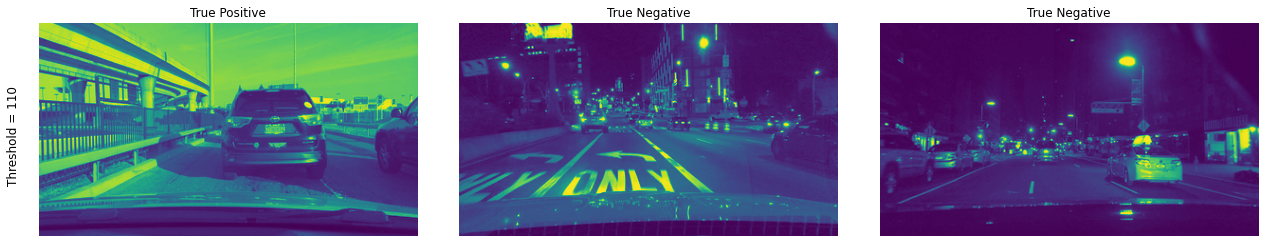

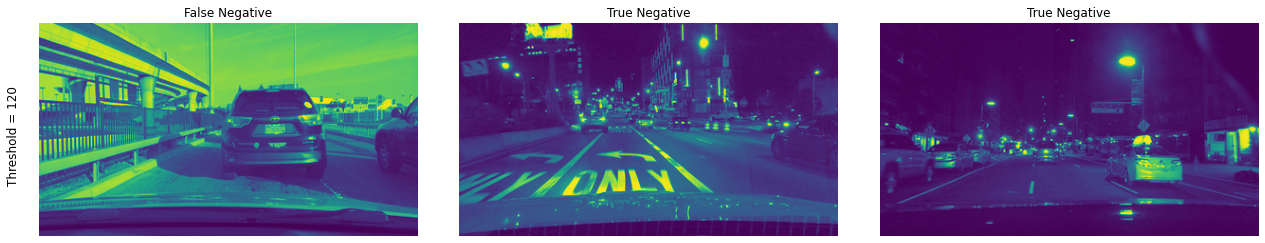

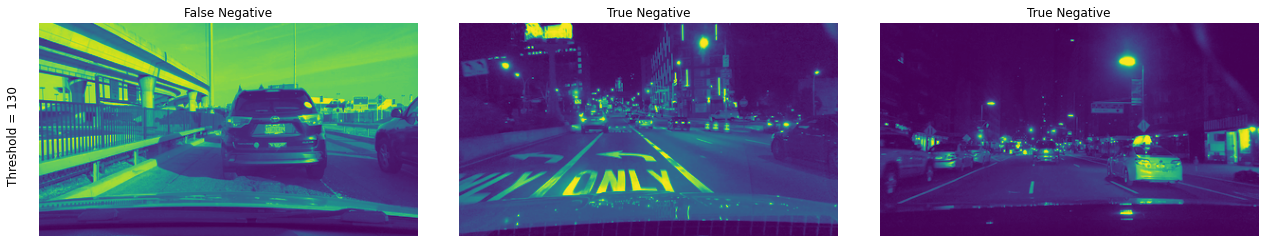

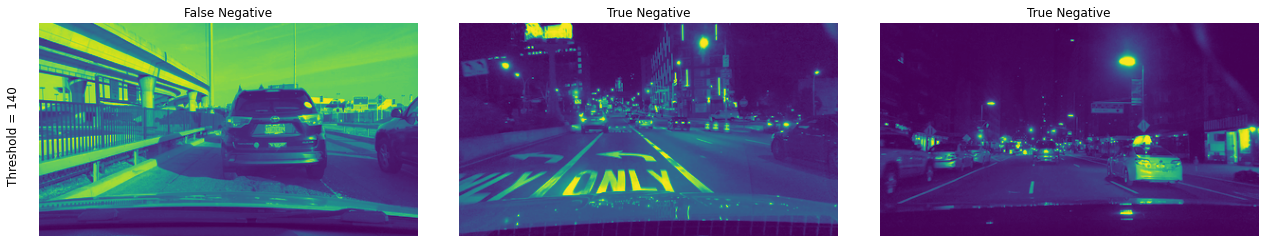

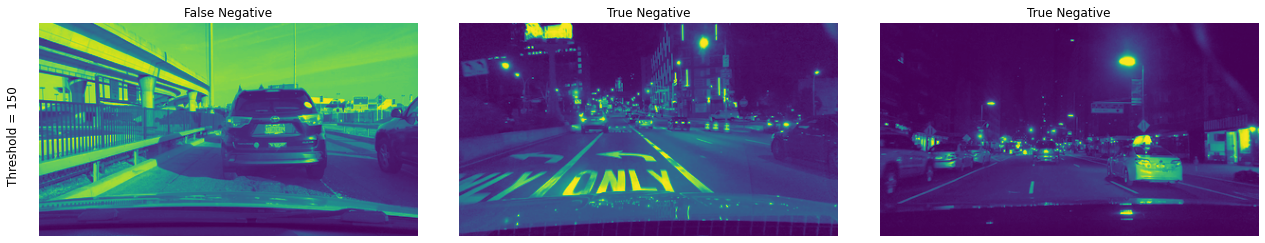

In [3]:
import imageio
import numpy as np


def is_bright(img, thrshld):
    return np.mean(img) > thrshld

for thrshld in range(30, 160, 10):
    fig, axs = plt.subplots(1,3)
    fig.set_size_inches(18, 10)
    fig.supylabel(f'Threshold = {thrshld}')
    fig.tight_layout()
    for i, frame_path in enumerate((bright_frame, partially_dark_frame, totally_dark_frame)):
        f = imageio.imread(frame_path, as_gray=True)
        axs[i].imshow(f)
        bright = is_bright(f, thrshld)
        if  bright and i == 0:
            title = 'True Positive'
        elif bright and i in [1, 2]:
            title = 'False Positive'
        elif not bright and i == 0:
            title = 'False Negative'
        elif not bright and i in [1, 2]:
            title = 'True Negative'
        axs[i].set_title(title)
        axs[i].axis('off')
    

### From the figures above we can see: we get false positives for threshold under $50$ and false negatives for threshold above $110$. We will take $85$ as the threshold for darkness.

In [4]:
from glob import glob

trajecotries_paths = sorted(glob(f'{input_path}/frame-extraction-*/frames/*'))

In [5]:
import imageio
import numpy as np


def is_bright_frame(frame_path, thrshld=85):
    img = imageio.imread(frame_path, as_gray=True)
    return np.mean(img) > thrshld

def get_all_dark_trajectories():
    dark_trajectories = []
    for trajectory_path in trajecotries_paths:
        trajectory_brightness_estimate = [is_bright_frame(frame) for frame in glob(f'{trajectory_path}/*')]
        is_dark_trajectory = trajectory_brightness_estimate.count(False) / len(trajectory_brightness_estimate) >= 0.70

        if is_dark_trajectory:
            dark_trajectories.append(trajectory_path)
    return dark_trajectories

In [6]:
all_dark_trajectories = get_all_dark_trajectories()

print(f'Found {len(all_dark_trajectories)} dark trajetories form total {len(trajecotries_paths)} trajecotry')

Found 6253 dark trajetories form total 14104 trajecotry


In [7]:
import pickle


with open('/kaggle/working/dark_trajectories.pkl', 'wb') as f:
     pickle.dump(all_dark_trajectories, f)